In [9]:
%load_ext watermark
%watermark -a Chan -d -v -p numpy,pandas,sklearn,konlpy,tensorflow,matplotlib,imblearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Chan 2019-08-19 

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
konlpy 0.5.1
tensorflow 1.13.1
matplotlib 3.1.0
imblearn 0.5.0


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow import keras
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
import pickle
from utils import morp_preprocessing

# Load datasets

In [11]:
datasets = pd.read_csv('../../data/train.csv', engine='python', encoding='utf-16')
datasets.head()


  1%|▉                                                                            | 540/42000 [00:19<02:45, 249.90it/s]

,Unnamed: 0,comment,url_id,label
0,0,ㅜㅜ,77,0
1,1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,17,0
2,2,헐,52,0
3,3,제시,75,0
4,4,이거인 듯,18,0


In [12]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 4 columns):
Unnamed: 0    42000 non-null int64
comment       42000 non-null object
url_id        42000 non-null int64
label         42000 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


# 형태소분석

In [13]:
chat = morp_preprocessing.chat_to_morp(datasets.comment)



  0%|                                                                                        | 0/42000 [00:00<?, ?it/s]

  0%|                                                                              | 51/42000 [00:00<01:23, 505.23it/s]

  0%|▏                                                                             | 82/42000 [00:00<01:40, 418.17it/s]

  0%|▏                                                                            | 123/42000 [00:00<01:41, 413.24it/s]

  0%|▎                                                                            | 151/42000 [00:00<02:12, 316.36it/s]

  0%|▍                                                                            | 206/42000 [00:00<01:58, 351.49it/s]

  1%|▍                                                                            | 238/42000 [00:00<02:02, 340.38it/s]

  1%|▍                                                                            | 272/42000 [00:00<02:11, 318.35it/s]

  1%|▌                        

  6%|████▊                                                                       | 2693/42000 [00:07<01:43, 381.36it/s]

  7%|████▉                                                                       | 2734/42000 [00:07<01:41, 387.38it/s]

  7%|█████                                                                       | 2774/42000 [00:07<01:44, 373.62it/s]

  7%|█████                                                                       | 2813/42000 [00:08<01:44, 376.26it/s]

  7%|█████▏                                                                      | 2852/42000 [00:08<01:43, 379.24it/s]

  7%|█████▏                                                                      | 2891/42000 [00:08<02:02, 319.64it/s]

  7%|█████▎                                                                      | 2925/42000 [00:08<02:19, 280.95it/s]

  7%|█████▎                                                                      | 2956/42000 [00:08<02:32, 255.54it/s]

  7%|█████▍                     

 14%|██████████▎                                                                 | 5726/42000 [00:16<01:10, 514.13it/s]

 14%|██████████▍                                                                 | 5781/42000 [00:16<01:16, 473.07it/s]

 14%|██████████▌                                                                 | 5831/42000 [00:16<01:19, 457.19it/s]

 14%|██████████▋                                                                 | 5879/42000 [00:16<01:50, 325.98it/s]

 14%|██████████▋                                                                 | 5936/42000 [00:16<01:37, 368.26it/s]

 14%|██████████▉                                                                 | 6019/42000 [00:16<01:21, 441.36it/s]

 14%|███████████                                                                 | 6084/42000 [00:16<01:13, 486.27it/s]

 15%|███████████▏                                                                | 6161/42000 [00:16<01:05, 543.30it/s]

 15%|███████████▎               

 23%|█████████████████▌                                                          | 9685/42000 [00:27<00:57, 564.71it/s]

 23%|█████████████████▋                                                          | 9755/42000 [00:27<00:53, 598.02it/s]

 23%|█████████████████▊                                                          | 9817/42000 [00:27<00:56, 564.91it/s]

 24%|█████████████████▉                                                          | 9880/42000 [00:27<00:55, 581.46it/s]

 24%|█████████████████▉                                                          | 9940/42000 [00:27<00:57, 555.96it/s]

 24%|█████████████████▊                                                         | 10000/42000 [00:27<00:56, 563.82it/s]

 24%|█████████████████▉                                                         | 10058/42000 [00:27<00:59, 532.66it/s]

 24%|██████████████████                                                         | 10138/42000 [00:27<00:54, 588.17it/s]

 24%|██████████████████▏        

 33%|████████████████████████▍                                                  | 13654/42000 [00:34<00:52, 536.25it/s]

 33%|████████████████████████▌                                                  | 13730/42000 [00:34<00:48, 586.92it/s]

 33%|████████████████████████▋                                                  | 13795/42000 [00:34<00:46, 602.93it/s]

 33%|████████████████████████▊                                                  | 13861/42000 [00:35<00:45, 617.35it/s]

 33%|████████████████████████▉                                                  | 13932/42000 [00:35<00:43, 639.14it/s]

 33%|████████████████████████▉                                                  | 13998/42000 [00:35<00:48, 574.61it/s]

 33%|█████████████████████████                                                  | 14058/42000 [00:35<00:50, 554.67it/s]

 34%|█████████████████████████▏                                                 | 14124/42000 [00:35<00:48, 579.58it/s]

 34%|█████████████████████████▎ 

 43%|████████████████████████████████▏                                          | 18035/42000 [00:42<00:50, 476.53it/s]

 43%|████████████████████████████████▎                                          | 18085/42000 [00:42<00:49, 480.63it/s]

 43%|████████████████████████████████▍                                          | 18146/42000 [00:42<00:46, 512.07it/s]

 43%|████████████████████████████████▌                                          | 18203/42000 [00:42<00:47, 505.77it/s]

 43%|████████████████████████████████▌                                          | 18255/42000 [00:42<00:46, 508.55it/s]

 44%|████████████████████████████████▋                                          | 18318/42000 [00:42<00:44, 537.08it/s]

 44%|████████████████████████████████▊                                          | 18384/42000 [00:42<00:41, 563.13it/s]

 44%|████████████████████████████████▉                                          | 18442/42000 [00:43<00:44, 526.44it/s]

 44%|███████████████████████████

 53%|███████████████████████████████████████▍                                   | 22116/42000 [00:49<00:31, 639.03it/s]

 53%|███████████████████████████████████████▌                                   | 22182/42000 [00:50<00:32, 607.87it/s]

 53%|███████████████████████████████████████▊                                   | 22264/42000 [00:50<00:30, 657.52it/s]

 53%|███████████████████████████████████████▉                                   | 22332/42000 [00:50<00:31, 632.72it/s]

 53%|███████████████████████████████████████▉                                   | 22399/42000 [00:50<00:30, 641.72it/s]

 54%|████████████████████████████████████████▏                                  | 22482/42000 [00:50<00:29, 670.33it/s]

 54%|████████████████████████████████████████▎                                  | 22553/42000 [00:50<00:28, 676.03it/s]

 54%|████████████████████████████████████████▍                                  | 22622/42000 [00:50<00:32, 597.29it/s]

 54%|███████████████████████████

 63%|███████████████████████████████████████████████▍                           | 26557/42000 [00:57<00:27, 553.03it/s]

 63%|███████████████████████████████████████████████▌                           | 26613/42000 [00:57<00:28, 534.56it/s]

 64%|███████████████████████████████████████████████▋                           | 26686/42000 [00:57<00:26, 575.82it/s]

 64%|███████████████████████████████████████████████▊                           | 26758/42000 [00:57<00:25, 609.60it/s]

 64%|███████████████████████████████████████████████▉                           | 26836/42000 [00:57<00:23, 650.82it/s]

 64%|████████████████████████████████████████████████                           | 26908/42000 [00:57<00:22, 666.52it/s]

 64%|████████████████████████████████████████████████▏                          | 26976/42000 [00:58<00:24, 622.75it/s]

 64%|████████████████████████████████████████████████▎                          | 27073/42000 [00:58<00:21, 693.28it/s]

 65%|███████████████████████████

 74%|███████████████████████████████████████████████████████▋                   | 31210/42000 [01:05<00:21, 508.38it/s]

 74%|███████████████████████████████████████████████████████▊                   | 31265/42000 [01:05<00:20, 514.44it/s]

 75%|███████████████████████████████████████████████████████▉                   | 31333/42000 [01:05<00:19, 552.35it/s]

 75%|████████████████████████████████████████████████████████                   | 31394/42000 [01:05<00:18, 566.97it/s]

 75%|████████████████████████████████████████████████████████▏                  | 31453/42000 [01:05<00:19, 542.17it/s]

 75%|████████████████████████████████████████████████████████▎                  | 31513/42000 [01:05<00:18, 555.30it/s]

 75%|████████████████████████████████████████████████████████▍                  | 31570/42000 [01:05<00:19, 525.68it/s]

 75%|████████████████████████████████████████████████████████▍                  | 31624/42000 [01:05<00:20, 504.73it/s]

 75%|███████████████████████████

 84%|██████████████████████████████████████████████████████████████▋            | 35106/42000 [01:12<00:13, 512.70it/s]

 84%|██████████████████████████████████████████████████████████████▊            | 35167/42000 [01:12<00:12, 537.13it/s]

 84%|██████████████████████████████████████████████████████████████▉            | 35230/42000 [01:12<00:12, 560.57it/s]

 84%|███████████████████████████████████████████████████████████████            | 35293/42000 [01:13<00:11, 578.23it/s]

 84%|███████████████████████████████████████████████████████████████▏           | 35355/42000 [01:13<00:11, 586.91it/s]

 84%|███████████████████████████████████████████████████████████████▏           | 35417/42000 [01:13<00:11, 593.14it/s]

 85%|███████████████████████████████████████████████████████████████▍           | 35502/42000 [01:13<00:10, 646.41it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 35575/42000 [01:13<00:09, 667.67it/s]

 85%|███████████████████████████

 94%|██████████████████████████████████████████████████████████████████████▎    | 39378/42000 [01:20<00:05, 489.21it/s]

 94%|██████████████████████████████████████████████████████████████████████▍    | 39436/42000 [01:20<00:05, 509.34it/s]

 94%|██████████████████████████████████████████████████████████████████████▌    | 39488/42000 [01:20<00:04, 505.11it/s]

 94%|██████████████████████████████████████████████████████████████████████▌    | 39540/42000 [01:20<00:05, 459.61it/s]

 94%|██████████████████████████████████████████████████████████████████████▋    | 39588/42000 [01:20<00:05, 453.74it/s]

 94%|██████████████████████████████████████████████████████████████████████▊    | 39639/42000 [01:20<00:05, 468.06it/s]

 94%|██████████████████████████████████████████████████████████████████████▊    | 39687/42000 [01:20<00:05, 426.43it/s]

 95%|██████████████████████████████████████████████████████████████████████▉    | 39745/42000 [01:20<00:04, 462.18it/s]

 95%|███████████████████████████

In [16]:
chat

array([[239,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [271,   0,   0, ...,   0,   0,   0],
       ...,
       [612,   5, 200, ...,  15,   2,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [ 61,  27,  61, ...,  95,   0,   0]])

In [17]:
def plot_loss(history):
    plt.figure(figsize=(6,5))
    val = plt.plot(history.epoch, history.history['val_loss'],
                 '--', label='Test')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
           label='Train')

    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [18]:
import warnings
warnings.filterwarnings(action='once')


# 데이터 클래스 불균형 문제 해결하자

In [19]:
X_train, X_test, y_train, y_test = train_test_split(chat, datasets.label)

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [21]:
up_X, up_y = RandomOverSampler().fit_resample(X_train, y_train)

# 총 데이터 수 , 1 레이블 데이터 수
len(up_y), up_y.sum()

(59842, 29921)

In [96]:
model_up = keras.Sequential([
    keras.layers.Embedding(30000, 10),
    keras.layers.Conv1D(64, 4, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

Train on 59842 samples, validate on 10500 samples
Epoch 1/5


11136/59842 [====>.........................] - ETA: 2:00:25 - loss: 0.6939 - recall_15: 0.53 - ETA: 1:00:58 - loss: 0.6936 - recall_15: 0.51 - ETA: 41:10 - loss: 0.6932 - recall_15: 0.4896 - ETA: 25:04 - loss: 0.6926 - recall_15: 0.49 - ETA: 18:12 - loss: 0.6927 - recall_15: 0.45 - ETA: 14:20 - loss: 0.6931 - recall_15: 0.45 - ETA: 11:53 - loss: 0.6932 - recall_15: 0.44 - ETA: 10:12 - loss: 0.6933 - recall_15: 0.44 - ETA: 8:57 - loss: 0.6931 - recall_15: 0.4479 - ETA: 7:59 - loss: 0.6934 - recall_15: 0.443 - ETA: 7:15 - loss: 0.6931 - recall_15: 0.439 - ETA: 6:39 - loss: 0.6932 - recall_15: 0.446 - ETA: 6:09 - loss: 0.6934 - recall_15: 0.445 - ETA: 5:44 - loss: 0.6933 - recall_15: 0.451 - ETA: 5:22 - loss: 0.6936 - recall_15: 0.446 - ETA: 5:04 - loss: 0.6934 - recall_15: 0.454 - ETA: 4:47 - loss: 0.6934 - recall_15: 0.457 - ETA: 4:33 - loss: 0.6934 - recall_15: 0.462 - ETA: 4:21 - loss: 0.6933 - recall_15: 0.471 - ETA: 4:09 - loss: 0.6931 - recall_15: 0.479 - ETA: 3:59 - loss: 0.6933 -

22752/59842 [==========>...................] - ETA: 1:05 - loss: 0.6687 - recall_15: 0.583 - ETA: 1:05 - loss: 0.6681 - recall_15: 0.584 - ETA: 1:04 - loss: 0.6675 - recall_15: 0.585 - ETA: 1:04 - loss: 0.6670 - recall_15: 0.585 - ETA: 1:04 - loss: 0.6664 - recall_15: 0.586 - ETA: 1:04 - loss: 0.6661 - recall_15: 0.586 - ETA: 1:04 - loss: 0.6656 - recall_15: 0.587 - ETA: 1:04 - loss: 0.6658 - recall_15: 0.588 - ETA: 1:03 - loss: 0.6658 - recall_15: 0.588 - ETA: 1:03 - loss: 0.6656 - recall_15: 0.589 - ETA: 1:03 - loss: 0.6653 - recall_15: 0.590 - ETA: 1:03 - loss: 0.6647 - recall_15: 0.591 - ETA: 1:03 - loss: 0.6642 - recall_15: 0.592 - ETA: 1:03 - loss: 0.6636 - recall_15: 0.592 - ETA: 1:02 - loss: 0.6630 - recall_15: 0.593 - ETA: 1:02 - loss: 0.6625 - recall_15: 0.594 - ETA: 1:02 - loss: 0.6617 - recall_15: 0.595 - ETA: 1:02 - loss: 0.6614 - recall_15: 0.595 - ETA: 1:02 - loss: 0.6613 - recall_15: 0.596 - ETA: 1:01 - loss: 0.6604 - recall_15: 0.597 - ETA: 1:01 - loss: 0.6603 - recall

34656/59842 [================>.............] - ETA: 42s - loss: 0.5865 - recall_15: 0.68 - ETA: 42s - loss: 0.5863 - recall_15: 0.68 - ETA: 42s - loss: 0.5862 - recall_15: 0.68 - ETA: 42s - loss: 0.5857 - recall_15: 0.68 - ETA: 42s - loss: 0.5853 - recall_15: 0.68 - ETA: 42s - loss: 0.5849 - recall_15: 0.68 - ETA: 42s - loss: 0.5844 - recall_15: 0.68 - ETA: 42s - loss: 0.5844 - recall_15: 0.68 - ETA: 41s - loss: 0.5838 - recall_15: 0.68 - ETA: 41s - loss: 0.5833 - recall_15: 0.68 - ETA: 41s - loss: 0.5825 - recall_15: 0.68 - ETA: 41s - loss: 0.5820 - recall_15: 0.68 - ETA: 41s - loss: 0.5820 - recall_15: 0.69 - ETA: 41s - loss: 0.5823 - recall_15: 0.69 - ETA: 41s - loss: 0.5818 - recall_15: 0.69 - ETA: 41s - loss: 0.5816 - recall_15: 0.69 - ETA: 41s - loss: 0.5812 - recall_15: 0.69 - ETA: 41s - loss: 0.5810 - recall_15: 0.69 - ETA: 40s - loss: 0.5805 - recall_15: 0.69 - ETA: 40s - loss: 0.5798 - recall_15: 0.69 - ETA: 40s - loss: 0.5793 - recall_15: 0.69 - ETA: 40s - loss: 0.5791 - rec

47520/59842 [======================>.......] - ETA: 26s - loss: 0.5338 - recall_15: 0.73 - ETA: 26s - loss: 0.5334 - recall_15: 0.73 - ETA: 26s - loss: 0.5332 - recall_15: 0.73 - ETA: 26s - loss: 0.5328 - recall_15: 0.73 - ETA: 26s - loss: 0.5325 - recall_15: 0.73 - ETA: 26s - loss: 0.5321 - recall_15: 0.73 - ETA: 26s - loss: 0.5318 - recall_15: 0.73 - ETA: 26s - loss: 0.5316 - recall_15: 0.73 - ETA: 26s - loss: 0.5313 - recall_15: 0.73 - ETA: 26s - loss: 0.5312 - recall_15: 0.73 - ETA: 26s - loss: 0.5312 - recall_15: 0.74 - ETA: 25s - loss: 0.5310 - recall_15: 0.74 - ETA: 25s - loss: 0.5306 - recall_15: 0.74 - ETA: 25s - loss: 0.5303 - recall_15: 0.74 - ETA: 25s - loss: 0.5301 - recall_15: 0.74 - ETA: 25s - loss: 0.5298 - recall_15: 0.74 - ETA: 25s - loss: 0.5296 - recall_15: 0.74 - ETA: 25s - loss: 0.5295 - recall_15: 0.74 - ETA: 25s - loss: 0.5297 - recall_15: 0.74 - ETA: 25s - loss: 0.5296 - recall_15: 0.74 - ETA: 25s - loss: 0.5294 - recall_15: 0.74 - ETA: 25s - loss: 0.5291 - rec

59648/59842 [============================>.] - ETA: 12s - loss: 0.4980 - recall_15: 0.77 - ETA: 12s - loss: 0.4980 - recall_15: 0.77 - ETA: 12s - loss: 0.4978 - recall_15: 0.77 - ETA: 12s - loss: 0.4975 - recall_15: 0.77 - ETA: 12s - loss: 0.4973 - recall_15: 0.77 - ETA: 12s - loss: 0.4970 - recall_15: 0.77 - ETA: 11s - loss: 0.4969 - recall_15: 0.77 - ETA: 11s - loss: 0.4969 - recall_15: 0.77 - ETA: 11s - loss: 0.4966 - recall_15: 0.77 - ETA: 11s - loss: 0.4964 - recall_15: 0.77 - ETA: 11s - loss: 0.4966 - recall_15: 0.77 - ETA: 11s - loss: 0.4964 - recall_15: 0.77 - ETA: 11s - loss: 0.4962 - recall_15: 0.77 - ETA: 11s - loss: 0.4960 - recall_15: 0.77 - ETA: 11s - loss: 0.4959 - recall_15: 0.77 - ETA: 11s - loss: 0.4958 - recall_15: 0.77 - ETA: 11s - loss: 0.4957 - recall_15: 0.77 - ETA: 11s - loss: 0.4957 - recall_15: 0.77 - ETA: 11s - loss: 0.4954 - recall_15: 0.77 - ETA: 11s - loss: 0.4952 - recall_15: 0.77 - ETA: 11s - loss: 0.4948 - recall_15: 0.77 - ETA: 10s - loss: 0.4946 - rec

59842/59842 [==============================] - ETA: 0s - loss: 0.4725 - recall_15: 0.791 - ETA: 0s - loss: 0.4724 - recall_15: 0.791 - ETA: 0s - loss: 0.4724 - recall_15: 0.791 - 62s 1ms/sample - loss: 0.4723 - recall_15: 0.7912 - val_loss: 0.3783 - val_recall_15: 0.9375
Epoch 2/5


12224/59842 [=====>........................] - ETA: 52s - loss: 0.3513 - recall_15: 0.87 - ETA: 52s - loss: 0.2932 - recall_15: 0.90 - ETA: 47s - loss: 0.3676 - recall_15: 0.89 - ETA: 48s - loss: 0.3434 - recall_15: 0.90 - ETA: 48s - loss: 0.3284 - recall_15: 0.90 - ETA: 49s - loss: 0.3079 - recall_15: 0.91 - ETA: 49s - loss: 0.3033 - recall_15: 0.91 - ETA: 50s - loss: 0.3135 - recall_15: 0.90 - ETA: 50s - loss: 0.3114 - recall_15: 0.90 - ETA: 50s - loss: 0.3158 - recall_15: 0.90 - ETA: 50s - loss: 0.3511 - recall_15: 0.89 - ETA: 50s - loss: 0.3495 - recall_15: 0.89 - ETA: 50s - loss: 0.3637 - recall_15: 0.88 - ETA: 50s - loss: 0.3652 - recall_15: 0.88 - ETA: 51s - loss: 0.3576 - recall_15: 0.89 - ETA: 51s - loss: 0.3550 - recall_15: 0.89 - ETA: 51s - loss: 0.3522 - recall_15: 0.88 - ETA: 51s - loss: 0.3492 - recall_15: 0.89 - ETA: 51s - loss: 0.3530 - recall_15: 0.88 - ETA: 51s - loss: 0.3490 - recall_15: 0.88 - ETA: 51s - loss: 0.3638 - recall_15: 0.88 - ETA: 51s - loss: 0.3645 - rec

24640/59842 [===========>..................] - ETA: 41s - loss: 0.3370 - recall_15: 0.88 - ETA: 41s - loss: 0.3368 - recall_15: 0.88 - ETA: 41s - loss: 0.3367 - recall_15: 0.88 - ETA: 41s - loss: 0.3369 - recall_15: 0.88 - ETA: 41s - loss: 0.3368 - recall_15: 0.88 - ETA: 41s - loss: 0.3365 - recall_15: 0.88 - ETA: 41s - loss: 0.3361 - recall_15: 0.88 - ETA: 41s - loss: 0.3365 - recall_15: 0.88 - ETA: 40s - loss: 0.3357 - recall_15: 0.88 - ETA: 40s - loss: 0.3359 - recall_15: 0.88 - ETA: 40s - loss: 0.3363 - recall_15: 0.88 - ETA: 40s - loss: 0.3364 - recall_15: 0.88 - ETA: 40s - loss: 0.3363 - recall_15: 0.88 - ETA: 40s - loss: 0.3358 - recall_15: 0.88 - ETA: 40s - loss: 0.3358 - recall_15: 0.88 - ETA: 40s - loss: 0.3366 - recall_15: 0.88 - ETA: 40s - loss: 0.3366 - recall_15: 0.88 - ETA: 40s - loss: 0.3364 - recall_15: 0.88 - ETA: 39s - loss: 0.3368 - recall_15: 0.88 - ETA: 39s - loss: 0.3367 - recall_15: 0.88 - ETA: 39s - loss: 0.3372 - recall_15: 0.88 - ETA: 39s - loss: 0.3368 - rec

37120/59842 [=================>............] - ETA: 30s - loss: 0.3423 - recall_15: 0.88 - ETA: 30s - loss: 0.3423 - recall_15: 0.88 - ETA: 30s - loss: 0.3420 - recall_15: 0.88 - ETA: 30s - loss: 0.3418 - recall_15: 0.88 - ETA: 30s - loss: 0.3415 - recall_15: 0.88 - ETA: 30s - loss: 0.3414 - recall_15: 0.88 - ETA: 30s - loss: 0.3424 - recall_15: 0.88 - ETA: 30s - loss: 0.3426 - recall_15: 0.88 - ETA: 30s - loss: 0.3423 - recall_15: 0.88 - ETA: 30s - loss: 0.3422 - recall_15: 0.88 - ETA: 29s - loss: 0.3420 - recall_15: 0.88 - ETA: 29s - loss: 0.3421 - recall_15: 0.88 - ETA: 29s - loss: 0.3421 - recall_15: 0.88 - ETA: 29s - loss: 0.3424 - recall_15: 0.88 - ETA: 29s - loss: 0.3422 - recall_15: 0.88 - ETA: 29s - loss: 0.3422 - recall_15: 0.88 - ETA: 29s - loss: 0.3421 - recall_15: 0.88 - ETA: 29s - loss: 0.3419 - recall_15: 0.88 - ETA: 29s - loss: 0.3418 - recall_15: 0.88 - ETA: 29s - loss: 0.3419 - recall_15: 0.88 - ETA: 29s - loss: 0.3416 - recall_15: 0.88 - ETA: 29s - loss: 0.3416 - rec

49216/59842 [=======================>......] - ETA: 19s - loss: 0.3372 - recall_15: 0.88 - ETA: 19s - loss: 0.3371 - recall_15: 0.88 - ETA: 19s - loss: 0.3371 - recall_15: 0.88 - ETA: 19s - loss: 0.3371 - recall_15: 0.88 - ETA: 19s - loss: 0.3373 - recall_15: 0.88 - ETA: 19s - loss: 0.3374 - recall_15: 0.88 - ETA: 19s - loss: 0.3372 - recall_15: 0.88 - ETA: 19s - loss: 0.3372 - recall_15: 0.88 - ETA: 19s - loss: 0.3373 - recall_15: 0.88 - ETA: 19s - loss: 0.3372 - recall_15: 0.88 - ETA: 19s - loss: 0.3371 - recall_15: 0.88 - ETA: 19s - loss: 0.3369 - recall_15: 0.88 - ETA: 18s - loss: 0.3369 - recall_15: 0.88 - ETA: 18s - loss: 0.3368 - recall_15: 0.88 - ETA: 18s - loss: 0.3370 - recall_15: 0.88 - ETA: 18s - loss: 0.3369 - recall_15: 0.88 - ETA: 18s - loss: 0.3370 - recall_15: 0.88 - ETA: 18s - loss: 0.3368 - recall_15: 0.88 - ETA: 18s - loss: 0.3366 - recall_15: 0.88 - ETA: 18s - loss: 0.3365 - recall_15: 0.88 - ETA: 18s - loss: 0.3364 - recall_15: 0.88 - ETA: 18s - loss: 0.3362 - rec

59842/59842 [==============================] - ETA: 9s - loss: 0.3343 - recall_15: 0.889 - ETA: 9s - loss: 0.3343 - recall_15: 0.889 - ETA: 9s - loss: 0.3344 - recall_15: 0.889 - ETA: 9s - loss: 0.3346 - recall_15: 0.889 - ETA: 9s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3347 - recall_15: 0.889 - ETA: 8s - loss: 0.3347 - recall_15: 0.889 - ETA: 8s - loss: 0.3348 - recall_15: 0.889 - ETA: 8s - loss: 0.3347 - recall_15: 0.889 - ETA: 8s - loss: 0.3346 - recall_15: 0.889 - ETA: 8s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3347 - recall_15: 0.889 - ETA: 8s - loss: 0.3345 - recall_15: 0.889 - ETA: 8s - loss: 0.3344 - recall_15: 0.889 - ETA: 8s - loss: 0.3343 - recall_15: 0.889 - ETA: 8s - loss: 0.3342 - recall_15: 0.889 - ETA: 8s - loss: 0.3341 - recall_15: 0.889 - ETA: 8s - loss: 0.3341 - recall_15: 0.889 - ETA: 8s - loss: 0.3341 - reca

11648/59842 [====>.........................] - ETA: 56s - loss: 0.2426 - recall_15: 0.93 - ETA: 51s - loss: 0.3321 - recall_15: 0.88 - ETA: 52s - loss: 0.3037 - recall_15: 0.90 - ETA: 51s - loss: 0.3401 - recall_15: 0.87 - ETA: 51s - loss: 0.3193 - recall_15: 0.89 - ETA: 51s - loss: 0.2928 - recall_15: 0.90 - ETA: 52s - loss: 0.3209 - recall_15: 0.90 - ETA: 52s - loss: 0.3078 - recall_15: 0.91 - ETA: 52s - loss: 0.3039 - recall_15: 0.91 - ETA: 51s - loss: 0.3145 - recall_15: 0.91 - ETA: 52s - loss: 0.3204 - recall_15: 0.90 - ETA: 52s - loss: 0.3149 - recall_15: 0.91 - ETA: 51s - loss: 0.3142 - recall_15: 0.90 - ETA: 51s - loss: 0.3078 - recall_15: 0.91 - ETA: 51s - loss: 0.3033 - recall_15: 0.90 - ETA: 52s - loss: 0.3326 - recall_15: 0.90 - ETA: 52s - loss: 0.3296 - recall_15: 0.90 - ETA: 52s - loss: 0.3241 - recall_15: 0.90 - ETA: 52s - loss: 0.3309 - recall_15: 0.90 - ETA: 52s - loss: 0.3248 - recall_15: 0.90 - ETA: 52s - loss: 0.3210 - recall_15: 0.90 - ETA: 52s - loss: 0.3157 - rec

23968/59842 [===========>..................] - ETA: 44s - loss: 0.3019 - recall_15: 0.90 - ETA: 44s - loss: 0.3019 - recall_15: 0.90 - ETA: 44s - loss: 0.3020 - recall_15: 0.90 - ETA: 44s - loss: 0.3018 - recall_15: 0.90 - ETA: 44s - loss: 0.3011 - recall_15: 0.90 - ETA: 44s - loss: 0.3005 - recall_15: 0.90 - ETA: 44s - loss: 0.3002 - recall_15: 0.90 - ETA: 44s - loss: 0.3002 - recall_15: 0.90 - ETA: 44s - loss: 0.3005 - recall_15: 0.90 - ETA: 44s - loss: 0.3007 - recall_15: 0.90 - ETA: 44s - loss: 0.3005 - recall_15: 0.90 - ETA: 44s - loss: 0.3004 - recall_15: 0.90 - ETA: 44s - loss: 0.3024 - recall_15: 0.90 - ETA: 43s - loss: 0.3029 - recall_15: 0.90 - ETA: 43s - loss: 0.3032 - recall_15: 0.90 - ETA: 43s - loss: 0.3031 - recall_15: 0.90 - ETA: 43s - loss: 0.3034 - recall_15: 0.90 - ETA: 43s - loss: 0.3033 - recall_15: 0.90 - ETA: 43s - loss: 0.3031 - recall_15: 0.90 - ETA: 43s - loss: 0.3033 - recall_15: 0.90 - ETA: 43s - loss: 0.3039 - recall_15: 0.90 - ETA: 43s - loss: 0.3052 - rec

35264/59842 [================>.............] - ETA: 32s - loss: 0.3095 - recall_15: 0.89 - ETA: 32s - loss: 0.3091 - recall_15: 0.89 - ETA: 32s - loss: 0.3090 - recall_15: 0.89 - ETA: 32s - loss: 0.3092 - recall_15: 0.89 - ETA: 32s - loss: 0.3092 - recall_15: 0.89 - ETA: 32s - loss: 0.3098 - recall_15: 0.89 - ETA: 31s - loss: 0.3097 - recall_15: 0.89 - ETA: 31s - loss: 0.3094 - recall_15: 0.89 - ETA: 31s - loss: 0.3096 - recall_15: 0.89 - ETA: 31s - loss: 0.3098 - recall_15: 0.89 - ETA: 31s - loss: 0.3104 - recall_15: 0.89 - ETA: 31s - loss: 0.3105 - recall_15: 0.89 - ETA: 31s - loss: 0.3106 - recall_15: 0.89 - ETA: 31s - loss: 0.3108 - recall_15: 0.89 - ETA: 31s - loss: 0.3113 - recall_15: 0.89 - ETA: 31s - loss: 0.3111 - recall_15: 0.89 - ETA: 31s - loss: 0.3109 - recall_15: 0.89 - ETA: 31s - loss: 0.3109 - recall_15: 0.89 - ETA: 31s - loss: 0.3106 - recall_15: 0.89 - ETA: 31s - loss: 0.3103 - recall_15: 0.89 - ETA: 31s - loss: 0.3102 - recall_15: 0.89 - ETA: 31s - loss: 0.3101 - rec

47328/59842 [======================>.......] - ETA: 23s - loss: 0.3068 - recall_15: 0.89 - ETA: 23s - loss: 0.3066 - recall_15: 0.89 - ETA: 23s - loss: 0.3065 - recall_15: 0.89 - ETA: 23s - loss: 0.3067 - recall_15: 0.89 - ETA: 23s - loss: 0.3070 - recall_15: 0.89 - ETA: 23s - loss: 0.3069 - recall_15: 0.89 - ETA: 23s - loss: 0.3069 - recall_15: 0.89 - ETA: 23s - loss: 0.3067 - recall_15: 0.89 - ETA: 23s - loss: 0.3068 - recall_15: 0.89 - ETA: 23s - loss: 0.3068 - recall_15: 0.89 - ETA: 22s - loss: 0.3067 - recall_15: 0.89 - ETA: 22s - loss: 0.3068 - recall_15: 0.89 - ETA: 22s - loss: 0.3066 - recall_15: 0.89 - ETA: 22s - loss: 0.3068 - recall_15: 0.89 - ETA: 22s - loss: 0.3068 - recall_15: 0.89 - ETA: 22s - loss: 0.3071 - recall_15: 0.89 - ETA: 22s - loss: 0.3074 - recall_15: 0.89 - ETA: 22s - loss: 0.3073 - recall_15: 0.89 - ETA: 22s - loss: 0.3073 - recall_15: 0.89 - ETA: 22s - loss: 0.3071 - recall_15: 0.89 - ETA: 22s - loss: 0.3071 - recall_15: 0.89 - ETA: 22s - loss: 0.3073 - rec

59232/59842 [============================>.] - ETA: 11s - loss: 0.3052 - recall_15: 0.90 - ETA: 11s - loss: 0.3053 - recall_15: 0.90 - ETA: 11s - loss: 0.3054 - recall_15: 0.90 - ETA: 11s - loss: 0.3053 - recall_15: 0.90 - ETA: 11s - loss: 0.3055 - recall_15: 0.90 - ETA: 11s - loss: 0.3055 - recall_15: 0.90 - ETA: 11s - loss: 0.3059 - recall_15: 0.90 - ETA: 11s - loss: 0.3062 - recall_15: 0.90 - ETA: 11s - loss: 0.3061 - recall_15: 0.90 - ETA: 11s - loss: 0.3060 - recall_15: 0.90 - ETA: 11s - loss: 0.3062 - recall_15: 0.90 - ETA: 11s - loss: 0.3062 - recall_15: 0.90 - ETA: 11s - loss: 0.3063 - recall_15: 0.90 - ETA: 11s - loss: 0.3064 - recall_15: 0.90 - ETA: 11s - loss: 0.3063 - recall_15: 0.90 - ETA: 10s - loss: 0.3062 - recall_15: 0.90 - ETA: 10s - loss: 0.3061 - recall_15: 0.90 - ETA: 10s - loss: 0.3060 - recall_15: 0.90 - ETA: 10s - loss: 0.3062 - recall_15: 0.90 - ETA: 10s - loss: 0.3062 - recall_15: 0.90 - ETA: 10s - loss: 0.3063 - recall_15: 0.90 - ETA: 10s - loss: 0.3062 - rec

59842/59842 [==============================] - ETA: 0s - loss: 0.3052 - recall_15: 0.901 - ETA: 0s - loss: 0.3052 - recall_15: 0.901 - ETA: 0s - loss: 0.3051 - recall_15: 0.901 - ETA: 0s - loss: 0.3052 - recall_15: 0.901 - ETA: 0s - loss: 0.3051 - recall_15: 0.901 - ETA: 0s - loss: 0.3051 - recall_15: 0.901 - ETA: 0s - loss: 0.3052 - recall_15: 0.901 - ETA: 0s - loss: 0.3051 - recall_15: 0.901 - ETA: 0s - loss: 0.3052 - recall_15: 0.901 - 59s 980us/sample - loss: 0.3052 - recall_15: 0.9011 - val_loss: 0.3051 - val_recall_15: 0.9420
Epoch 4/5


11296/59842 [====>.........................] - ETA: 54s - loss: 0.3481 - recall_15: 0.87 - ETA: 56s - loss: 0.3226 - recall_15: 0.88 - ETA: 54s - loss: 0.3746 - recall_15: 0.88 - ETA: 52s - loss: 0.4216 - recall_15: 0.85 - ETA: 52s - loss: 0.4009 - recall_15: 0.86 - ETA: 52s - loss: 0.3773 - recall_15: 0.87 - ETA: 52s - loss: 0.3746 - recall_15: 0.86 - ETA: 52s - loss: 0.3688 - recall_15: 0.86 - ETA: 51s - loss: 0.3594 - recall_15: 0.87 - ETA: 51s - loss: 0.3555 - recall_15: 0.86 - ETA: 51s - loss: 0.3497 - recall_15: 0.87 - ETA: 51s - loss: 0.3363 - recall_15: 0.87 - ETA: 51s - loss: 0.3302 - recall_15: 0.88 - ETA: 51s - loss: 0.3432 - recall_15: 0.87 - ETA: 50s - loss: 0.3427 - recall_15: 0.87 - ETA: 50s - loss: 0.3348 - recall_15: 0.87 - ETA: 50s - loss: 0.3317 - recall_15: 0.87 - ETA: 50s - loss: 0.3263 - recall_15: 0.88 - ETA: 49s - loss: 0.3228 - recall_15: 0.88 - ETA: 49s - loss: 0.3145 - recall_15: 0.88 - ETA: 49s - loss: 0.3167 - recall_15: 0.88 - ETA: 49s - loss: 0.3111 - rec

23072/59842 [==========>...................] - ETA: 51s - loss: 0.2962 - recall_15: 0.90 - ETA: 50s - loss: 0.2959 - recall_15: 0.90 - ETA: 50s - loss: 0.2956 - recall_15: 0.90 - ETA: 50s - loss: 0.2950 - recall_15: 0.90 - ETA: 50s - loss: 0.2957 - recall_15: 0.90 - ETA: 50s - loss: 0.2955 - recall_15: 0.90 - ETA: 50s - loss: 0.2954 - recall_15: 0.90 - ETA: 50s - loss: 0.2952 - recall_15: 0.90 - ETA: 50s - loss: 0.2947 - recall_15: 0.90 - ETA: 50s - loss: 0.2941 - recall_15: 0.90 - ETA: 50s - loss: 0.2945 - recall_15: 0.90 - ETA: 50s - loss: 0.2939 - recall_15: 0.90 - ETA: 50s - loss: 0.2934 - recall_15: 0.90 - ETA: 50s - loss: 0.2934 - recall_15: 0.90 - ETA: 50s - loss: 0.2931 - recall_15: 0.90 - ETA: 50s - loss: 0.2928 - recall_15: 0.90 - ETA: 49s - loss: 0.2925 - recall_15: 0.90 - ETA: 49s - loss: 0.2926 - recall_15: 0.90 - ETA: 49s - loss: 0.2920 - recall_15: 0.90 - ETA: 49s - loss: 0.2918 - recall_15: 0.90 - ETA: 49s - loss: 0.2914 - recall_15: 0.90 - ETA: 49s - loss: 0.2918 - rec

34816/59842 [================>.............] - ETA: 38s - loss: 0.2824 - recall_15: 0.90 - ETA: 38s - loss: 0.2826 - recall_15: 0.90 - ETA: 38s - loss: 0.2830 - recall_15: 0.90 - ETA: 37s - loss: 0.2830 - recall_15: 0.90 - ETA: 37s - loss: 0.2826 - recall_15: 0.90 - ETA: 37s - loss: 0.2826 - recall_15: 0.90 - ETA: 37s - loss: 0.2825 - recall_15: 0.90 - ETA: 37s - loss: 0.2825 - recall_15: 0.90 - ETA: 37s - loss: 0.2825 - recall_15: 0.90 - ETA: 37s - loss: 0.2827 - recall_15: 0.90 - ETA: 37s - loss: 0.2829 - recall_15: 0.90 - ETA: 37s - loss: 0.2832 - recall_15: 0.90 - ETA: 37s - loss: 0.2834 - recall_15: 0.90 - ETA: 37s - loss: 0.2833 - recall_15: 0.90 - ETA: 37s - loss: 0.2833 - recall_15: 0.90 - ETA: 37s - loss: 0.2836 - recall_15: 0.90 - ETA: 37s - loss: 0.2836 - recall_15: 0.90 - ETA: 36s - loss: 0.2838 - recall_15: 0.90 - ETA: 36s - loss: 0.2836 - recall_15: 0.90 - ETA: 36s - loss: 0.2837 - recall_15: 0.90 - ETA: 36s - loss: 0.2835 - recall_15: 0.90 - ETA: 36s - loss: 0.2835 - rec

46656/59842 [======================>.......] - ETA: 25s - loss: 0.2854 - recall_15: 0.90 - ETA: 25s - loss: 0.2853 - recall_15: 0.90 - ETA: 25s - loss: 0.2852 - recall_15: 0.90 - ETA: 25s - loss: 0.2857 - recall_15: 0.90 - ETA: 25s - loss: 0.2860 - recall_15: 0.90 - ETA: 25s - loss: 0.2861 - recall_15: 0.90 - ETA: 25s - loss: 0.2862 - recall_15: 0.90 - ETA: 25s - loss: 0.2864 - recall_15: 0.90 - ETA: 25s - loss: 0.2867 - recall_15: 0.90 - ETA: 25s - loss: 0.2867 - recall_15: 0.90 - ETA: 25s - loss: 0.2867 - recall_15: 0.90 - ETA: 25s - loss: 0.2867 - recall_15: 0.90 - ETA: 25s - loss: 0.2867 - recall_15: 0.90 - ETA: 24s - loss: 0.2867 - recall_15: 0.90 - ETA: 24s - loss: 0.2865 - recall_15: 0.90 - ETA: 24s - loss: 0.2866 - recall_15: 0.90 - ETA: 24s - loss: 0.2868 - recall_15: 0.90 - ETA: 24s - loss: 0.2869 - recall_15: 0.90 - ETA: 24s - loss: 0.2872 - recall_15: 0.90 - ETA: 24s - loss: 0.2871 - recall_15: 0.90 - ETA: 24s - loss: 0.2870 - recall_15: 0.90 - ETA: 24s - loss: 0.2871 - rec

58528/59842 [============================>.] - ETA: 13s - loss: 0.2883 - recall_15: 0.90 - ETA: 13s - loss: 0.2882 - recall_15: 0.90 - ETA: 13s - loss: 0.2880 - recall_15: 0.90 - ETA: 13s - loss: 0.2880 - recall_15: 0.90 - ETA: 13s - loss: 0.2880 - recall_15: 0.90 - ETA: 13s - loss: 0.2878 - recall_15: 0.90 - ETA: 13s - loss: 0.2878 - recall_15: 0.90 - ETA: 12s - loss: 0.2876 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2875 - recall_15: 0.90 - ETA: 12s - loss: 0.2874 - recall_15: 0.90 - ETA: 12s - loss: 0.2874 - recall_15: 0.90 - ETA: 12s - loss: 0.2873 - recall_15: 0.90 - ETA: 12s - loss: 0.2875 - recall_15: 0.90 - ETA: 12s - loss: 0.2876 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2876 - recall_15: 0.90 - ETA: 12s - loss: 0.2877 - recall_15: 0.90 - ETA: 12s - loss: 0.2878 - rec

59842/59842 [==============================] - ETA: 1s - loss: 0.2882 - recall_15: 0.906 - ETA: 1s - loss: 0.2881 - recall_15: 0.906 - ETA: 1s - loss: 0.2881 - recall_15: 0.906 - ETA: 1s - loss: 0.2881 - recall_15: 0.906 - ETA: 1s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2880 - recall_15: 0.906 - ETA: 0s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2880 - recall_15: 0.906 - ETA: 0s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2882 - recall_15: 0.906 - ETA: 0s - loss: 0.2882 - recall_15: 0.906 - ETA: 0s - loss: 0.2882 - recall_15: 0.906 - ETA: 0s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2881 - recall_15: 0.906 - ETA: 0s - loss: 0.2882 - recall_15: 0.906 - ETA: 0s - loss: 0.2880 - recall_15: 0.906 - ETA: 0s - loss: 0.2878 - recall_15: 0.906 - ETA: 0s - loss: 0.2879 - recall_15: 0.906 - ETA: 0s - loss: 0.2879 - recall_15: 0.906 - 63s 1ms/sample - loss: 0.2878 - recall_15: 0.9067 - val_loss: 0.3199 - va

11296/59842 [====>.........................] - ETA: 1:01 - loss: 0.2116 - recall_15: 0.937 - ETA: 54s - loss: 0.2869 - recall_15: 0.895 - ETA: 55s - loss: 0.2330 - recall_15: 0.92 - ETA: 55s - loss: 0.2190 - recall_15: 0.93 - ETA: 54s - loss: 0.2392 - recall_15: 0.93 - ETA: 55s - loss: 0.2267 - recall_15: 0.94 - ETA: 55s - loss: 0.2333 - recall_15: 0.93 - ETA: 55s - loss: 0.2335 - recall_15: 0.93 - ETA: 55s - loss: 0.2333 - recall_15: 0.93 - ETA: 55s - loss: 0.2412 - recall_15: 0.93 - ETA: 55s - loss: 0.2446 - recall_15: 0.93 - ETA: 54s - loss: 0.2471 - recall_15: 0.93 - ETA: 55s - loss: 0.2443 - recall_15: 0.93 - ETA: 54s - loss: 0.2390 - recall_15: 0.93 - ETA: 54s - loss: 0.2414 - recall_15: 0.93 - ETA: 54s - loss: 0.2405 - recall_15: 0.93 - ETA: 54s - loss: 0.2360 - recall_15: 0.93 - ETA: 54s - loss: 0.2317 - recall_15: 0.93 - ETA: 54s - loss: 0.2361 - recall_15: 0.93 - ETA: 54s - loss: 0.2410 - recall_15: 0.93 - ETA: 54s - loss: 0.2470 - recall_15: 0.93 - ETA: 54s - loss: 0.2442 - 

22944/59842 [==========>...................] - ETA: 51s - loss: 0.2675 - recall_15: 0.91 - ETA: 50s - loss: 0.2676 - recall_15: 0.91 - ETA: 50s - loss: 0.2676 - recall_15: 0.91 - ETA: 50s - loss: 0.2677 - recall_15: 0.91 - ETA: 50s - loss: 0.2675 - recall_15: 0.91 - ETA: 50s - loss: 0.2676 - recall_15: 0.91 - ETA: 50s - loss: 0.2679 - recall_15: 0.91 - ETA: 50s - loss: 0.2684 - recall_15: 0.91 - ETA: 50s - loss: 0.2683 - recall_15: 0.91 - ETA: 50s - loss: 0.2681 - recall_15: 0.91 - ETA: 50s - loss: 0.2680 - recall_15: 0.91 - ETA: 50s - loss: 0.2687 - recall_15: 0.91 - ETA: 50s - loss: 0.2688 - recall_15: 0.91 - ETA: 50s - loss: 0.2686 - recall_15: 0.91 - ETA: 49s - loss: 0.2683 - recall_15: 0.91 - ETA: 49s - loss: 0.2678 - recall_15: 0.91 - ETA: 49s - loss: 0.2693 - recall_15: 0.91 - ETA: 49s - loss: 0.2691 - recall_15: 0.91 - ETA: 49s - loss: 0.2688 - recall_15: 0.91 - ETA: 49s - loss: 0.2685 - recall_15: 0.91 - ETA: 49s - loss: 0.2683 - recall_15: 0.91 - ETA: 49s - loss: 0.2678 - rec

34688/59842 [================>.............] - ETA: 38s - loss: 0.2720 - recall_15: 0.91 - ETA: 38s - loss: 0.2726 - recall_15: 0.91 - ETA: 38s - loss: 0.2723 - recall_15: 0.91 - ETA: 38s - loss: 0.2724 - recall_15: 0.91 - ETA: 38s - loss: 0.2724 - recall_15: 0.91 - ETA: 38s - loss: 0.2723 - recall_15: 0.91 - ETA: 38s - loss: 0.2731 - recall_15: 0.91 - ETA: 38s - loss: 0.2729 - recall_15: 0.91 - ETA: 38s - loss: 0.2728 - recall_15: 0.91 - ETA: 38s - loss: 0.2732 - recall_15: 0.91 - ETA: 38s - loss: 0.2732 - recall_15: 0.91 - ETA: 38s - loss: 0.2729 - recall_15: 0.91 - ETA: 37s - loss: 0.2725 - recall_15: 0.91 - ETA: 37s - loss: 0.2724 - recall_15: 0.91 - ETA: 37s - loss: 0.2721 - recall_15: 0.91 - ETA: 37s - loss: 0.2719 - recall_15: 0.91 - ETA: 37s - loss: 0.2721 - recall_15: 0.91 - ETA: 37s - loss: 0.2718 - recall_15: 0.91 - ETA: 37s - loss: 0.2717 - recall_15: 0.91 - ETA: 37s - loss: 0.2720 - recall_15: 0.91 - ETA: 37s - loss: 0.2717 - recall_15: 0.91 - ETA: 37s - loss: 0.2719 - rec

46560/59842 [======================>.......] - ETA: 26s - loss: 0.2769 - recall_15: 0.91 - ETA: 26s - loss: 0.2771 - recall_15: 0.91 - ETA: 26s - loss: 0.2770 - recall_15: 0.91 - ETA: 26s - loss: 0.2770 - recall_15: 0.91 - ETA: 25s - loss: 0.2769 - recall_15: 0.91 - ETA: 25s - loss: 0.2767 - recall_15: 0.91 - ETA: 25s - loss: 0.2768 - recall_15: 0.91 - ETA: 25s - loss: 0.2767 - recall_15: 0.91 - ETA: 25s - loss: 0.2765 - recall_15: 0.91 - ETA: 25s - loss: 0.2763 - recall_15: 0.91 - ETA: 25s - loss: 0.2766 - recall_15: 0.91 - ETA: 25s - loss: 0.2765 - recall_15: 0.91 - ETA: 25s - loss: 0.2766 - recall_15: 0.91 - ETA: 25s - loss: 0.2766 - recall_15: 0.91 - ETA: 25s - loss: 0.2766 - recall_15: 0.91 - ETA: 25s - loss: 0.2765 - recall_15: 0.91 - ETA: 25s - loss: 0.2764 - recall_15: 0.91 - ETA: 25s - loss: 0.2765 - recall_15: 0.91 - ETA: 25s - loss: 0.2764 - recall_15: 0.91 - ETA: 24s - loss: 0.2767 - recall_15: 0.91 - ETA: 24s - loss: 0.2766 - recall_15: 0.91 - ETA: 24s - loss: 0.2771 - rec

58336/59842 [============================>.] - ETA: 13s - loss: 0.2775 - recall_15: 0.91 - ETA: 13s - loss: 0.2774 - recall_15: 0.91 - ETA: 13s - loss: 0.2773 - recall_15: 0.91 - ETA: 13s - loss: 0.2771 - recall_15: 0.91 - ETA: 13s - loss: 0.2773 - recall_15: 0.91 - ETA: 13s - loss: 0.2773 - recall_15: 0.91 - ETA: 13s - loss: 0.2773 - recall_15: 0.91 - ETA: 13s - loss: 0.2773 - recall_15: 0.91 - ETA: 13s - loss: 0.2777 - recall_15: 0.91 - ETA: 13s - loss: 0.2776 - recall_15: 0.91 - ETA: 13s - loss: 0.2776 - recall_15: 0.91 - ETA: 12s - loss: 0.2776 - recall_15: 0.91 - ETA: 12s - loss: 0.2775 - recall_15: 0.91 - ETA: 12s - loss: 0.2774 - recall_15: 0.91 - ETA: 12s - loss: 0.2774 - recall_15: 0.91 - ETA: 12s - loss: 0.2773 - recall_15: 0.91 - ETA: 12s - loss: 0.2773 - recall_15: 0.91 - ETA: 12s - loss: 0.2773 - recall_15: 0.91 - ETA: 12s - loss: 0.2776 - recall_15: 0.91 - ETA: 12s - loss: 0.2775 - recall_15: 0.91 - ETA: 12s - loss: 0.2776 - recall_15: 0.91 - ETA: 12s - loss: 0.2775 - rec

10500/10500 [==============================] - ETA: 2s - loss: 0.1953 - recall_15: 1.000 - ETA: 2s - loss: 0.3256 - recall_15: 0.960 - ETA: 2s - loss: 0.3382 - recall_15: 0.937 - ETA: 2s - loss: 0.3112 - recall_15: 0.947 - ETA: 3s - loss: 0.3137 - recall_15: 0.948 - ETA: 3s - loss: 0.3176 - recall_15: 0.946 - ETA: 3s - loss: 0.3152 - recall_15: 0.946 - ETA: 4s - loss: 0.3132 - recall_15: 0.947 - ETA: 5s - loss: 0.3124 - recall_15: 0.948 - ETA: 5s - loss: 0.3065 - recall_15: 0.949 - ETA: 5s - loss: 0.3029 - recall_15: 0.950 - ETA: 5s - loss: 0.3028 - recall_15: 0.947 - ETA: 5s - loss: 0.3020 - recall_15: 0.946 - ETA: 5s - loss: 0.3010 - recall_15: 0.946 - ETA: 5s - loss: 0.2972 - recall_15: 0.947 - ETA: 5s - loss: 0.2976 - recall_15: 0.948 - ETA: 5s - loss: 0.2958 - recall_15: 0.948 - ETA: 5s - loss: 0.2946 - recall_15: 0.948 - ETA: 5s - loss: 0.2916 - recall_15: 0.949 - ETA: 5s - loss: 0.2908 - recall_15: 0.949 - ETA: 5s - loss: 0.2910 - recall_15: 0.949 - ETA: 5s - loss: 0.2880 - reca

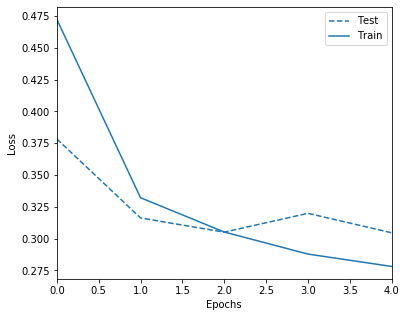

In [97]:
model_up.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model_up.fit(up_X,
          pd.get_dummies(up_y),
          epochs=10,
          validation_data=(X_test, pd.get_dummies(y_test))
         )
plot_loss(history)
test_loss, test_acc = model_up.evaluate(X_test, pd.get_dummies(y_test))
print('Test accuracy:', test_acc)

In [98]:
print('전체채팅수{}, 유해채팅수{}'.format(len(X_test),model_up.predict_classes(X_test).sum()))

전체채팅수10500, 유해채팅수498


### Recall

In [59]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [99]:
recall_score(y_test, model_up.predict_classes(X_test)),\
accuracy_score(y_test, model_up.predict_classes(X_test)),\
f1_score(y_test, model_up.predict_classes(X_test))

(0.390715667311412, 0.9418095238095238, 0.3980295566502463)

In [ ]:
model_up.save('../model/cnn_oversample.h5')

## Downsampling

In [102]:
down_X, down_y = RandomUnderSampler().fit_resample(chat, datasets.label)

# 총 데이터 수 , 1 레이블 데이터 수
len(down_y), down_y.sum()

(4192, 2096)

In [101]:
model_down = keras.Sequential([
    keras.layers.Embedding(30000, 10),
    keras.layers.Conv1D(64, 3, padding="same", activation=tf.nn.relu,),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

Train on 4192 samples, validate on 10500 samples
Epoch 1/10
4192/4192 [==============================] - ETA: 7:29 - loss: 0.0621 - recall_19: 0.968 - ETA: 1:51 - loss: 0.0446 - recall_19: 0.984 - ETA: 1:03 - loss: 0.0402 - recall_19: 0.986 - ETA: 44s - loss: 0.0575 - recall_19: 0.978 - ETA: 36s - loss: 0.0500 - recall_19: 0.98 - ETA: 31s - loss: 0.0585 - recall_19: 0.97 - ETA: 27s - loss: 0.0566 - recall_19: 0.97 - ETA: 24s - loss: 0.0620 - recall_19: 0.97 - ETA: 20s - loss: 0.0573 - recall_19: 0.97 - ETA: 17s - loss: 0.0527 - recall_19: 0.97 - ETA: 15s - loss: 0.0550 - recall_19: 0.97 - ETA: 13s - loss: 0.0504 - recall_19: 0.97 - ETA: 12s - loss: 0.0494 - recall_19: 0.97 - ETA: 11s - loss: 0.0552 - recall_19: 0.97 - ETA: 10s - loss: 0.0577 - recall_19: 0.97 - ETA: 9s - loss: 0.0600 - recall_19: 0.9742 - ETA: 9s - loss: 0.0591 - recall_19: 0.974 - ETA: 8s - loss: 0.0583 - recall_19: 0.975 - ETA: 8s - loss: 0.0577 - recall_19: 0.975 - ETA: 7s - loss: 0.0569 - recall_19: 0.975 - ETA: 7s

4192/4192 [==============================] - ETA: 2s - loss: 0.0965 - recall_19: 0.968 - ETA: 2s - loss: 0.1143 - recall_19: 0.960 - ETA: 2s - loss: 0.0825 - recall_19: 0.968 - ETA: 2s - loss: 0.0711 - recall_19: 0.975 - ETA: 2s - loss: 0.0645 - recall_19: 0.977 - ETA: 2s - loss: 0.0604 - recall_19: 0.978 - ETA: 2s - loss: 0.0565 - recall_19: 0.979 - ETA: 2s - loss: 0.0551 - recall_19: 0.979 - ETA: 2s - loss: 0.0524 - recall_19: 0.981 - ETA: 2s - loss: 0.0511 - recall_19: 0.983 - ETA: 2s - loss: 0.0536 - recall_19: 0.983 - ETA: 2s - loss: 0.0521 - recall_19: 0.985 - ETA: 2s - loss: 0.0494 - recall_19: 0.986 - ETA: 2s - loss: 0.0520 - recall_19: 0.984 - ETA: 2s - loss: 0.0523 - recall_19: 0.983 - ETA: 2s - loss: 0.0533 - recall_19: 0.983 - ETA: 2s - loss: 0.0573 - recall_19: 0.979 - ETA: 2s - loss: 0.0557 - recall_19: 0.979 - ETA: 2s - loss: 0.0565 - recall_19: 0.978 - ETA: 2s - loss: 0.0561 - recall_19: 0.977 - ETA: 2s - loss: 0.0589 - recall_19: 0.976 - ETA: 2s - loss: 0.0571 - recall

4192/4192 [==============================] - ETA: 3s - loss: 0.0516 - recall_19: 0.968 - ETA: 3s - loss: 0.0478 - recall_19: 0.979 - ETA: 3s - loss: 0.0574 - recall_19: 0.962 - ETA: 3s - loss: 0.0440 - recall_19: 0.973 - ETA: 3s - loss: 0.0440 - recall_19: 0.975 - ETA: 3s - loss: 0.0438 - recall_19: 0.977 - ETA: 3s - loss: 0.0445 - recall_19: 0.978 - ETA: 3s - loss: 0.0459 - recall_19: 0.977 - ETA: 3s - loss: 0.0476 - recall_19: 0.976 - ETA: 3s - loss: 0.0454 - recall_19: 0.977 - ETA: 3s - loss: 0.0445 - recall_19: 0.977 - ETA: 3s - loss: 0.0497 - recall_19: 0.976 - ETA: 3s - loss: 0.0572 - recall_19: 0.977 - ETA: 3s - loss: 0.0604 - recall_19: 0.975 - ETA: 2s - loss: 0.0583 - recall_19: 0.976 - ETA: 2s - loss: 0.0591 - recall_19: 0.973 - ETA: 2s - loss: 0.0631 - recall_19: 0.971 - ETA: 2s - loss: 0.0600 - recall_19: 0.973 - ETA: 2s - loss: 0.0580 - recall_19: 0.974 - ETA: 2s - loss: 0.0628 - recall_19: 0.972 - ETA: 2s - loss: 0.0611 - recall_19: 0.974 - ETA: 2s - loss: 0.0612 - recall

4192/4192 [==============================] - ETA: 2s - loss: 0.0062 - recall_19: 1.000 - ETA: 2s - loss: 0.0453 - recall_19: 0.992 - ETA: 2s - loss: 0.0652 - recall_19: 0.968 - ETA: 2s - loss: 0.0627 - recall_19: 0.972 - ETA: 2s - loss: 0.0543 - recall_19: 0.977 - ETA: 2s - loss: 0.0594 - recall_19: 0.971 - ETA: 2s - loss: 0.0641 - recall_19: 0.966 - ETA: 2s - loss: 0.0742 - recall_19: 0.961 - ETA: 2s - loss: 0.0702 - recall_19: 0.964 - ETA: 2s - loss: 0.0657 - recall_19: 0.965 - ETA: 2s - loss: 0.0645 - recall_19: 0.967 - ETA: 2s - loss: 0.0645 - recall_19: 0.967 - ETA: 2s - loss: 0.0607 - recall_19: 0.969 - ETA: 2s - loss: 0.0602 - recall_19: 0.969 - ETA: 2s - loss: 0.0576 - recall_19: 0.971 - ETA: 2s - loss: 0.0556 - recall_19: 0.973 - ETA: 2s - loss: 0.0554 - recall_19: 0.973 - ETA: 2s - loss: 0.0553 - recall_19: 0.972 - ETA: 2s - loss: 0.0538 - recall_19: 0.974 - ETA: 2s - loss: 0.0518 - recall_19: 0.975 - ETA: 2s - loss: 0.0532 - recall_19: 0.974 - ETA: 2s - loss: 0.0526 - recall

4192/4192 [==============================] - ETA: 2s - loss: 0.0181 - recall_19: 1.000 - ETA: 2s - loss: 0.0388 - recall_19: 0.992 - ETA: 2s - loss: 0.0629 - recall_19: 0.974 - ETA: 3s - loss: 0.0606 - recall_19: 0.976 - ETA: 2s - loss: 0.0502 - recall_19: 0.980 - ETA: 2s - loss: 0.0510 - recall_19: 0.978 - ETA: 2s - loss: 0.0825 - recall_19: 0.979 - ETA: 2s - loss: 0.0731 - recall_19: 0.981 - ETA: 2s - loss: 0.0683 - recall_19: 0.981 - ETA: 2s - loss: 0.0655 - recall_19: 0.982 - ETA: 2s - loss: 0.0670 - recall_19: 0.980 - ETA: 2s - loss: 0.0642 - recall_19: 0.981 - ETA: 2s - loss: 0.0676 - recall_19: 0.980 - ETA: 2s - loss: 0.0662 - recall_19: 0.979 - ETA: 2s - loss: 0.0670 - recall_19: 0.977 - ETA: 2s - loss: 0.0687 - recall_19: 0.977 - ETA: 2s - loss: 0.0662 - recall_19: 0.978 - ETA: 2s - loss: 0.0648 - recall_19: 0.979 - ETA: 2s - loss: 0.0630 - recall_19: 0.980 - ETA: 2s - loss: 0.0635 - recall_19: 0.978 - ETA: 2s - loss: 0.0625 - recall_19: 0.978 - ETA: 2s - loss: 0.0623 - recall

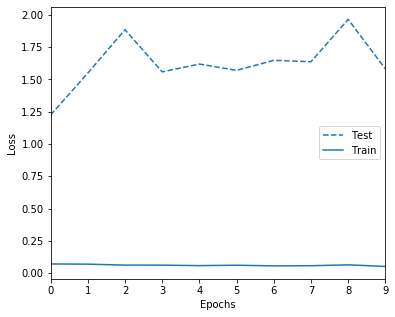

In [112]:
model_down.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model_down.fit(down_X,
          pd.get_dummies(down_y),
          epochs=10,
          validation_data=(X_test, pd.get_dummies(y_test))
         )
plot_loss(history)
test_loss, test_acc = model_down.evaluate(X_test, pd.get_dummies(y_test))
print('Test Recall:', test_acc)

In [113]:
#recall
recall_score(y_test, model_down.predict_classes(X_test)), \
accuracy_score(y_test, model_down.predict_classes(X_test)),\
f1_score(y_test, model_down.predict_classes(X_test))

(0.9400386847195358, 0.8397142857142857, 0.36610169491525424)

In [114]:
print('전체채팅수{}, 유해채팅수{}'.format(len(X_test),model_down.predict_classes(X_test).sum()))

전체채팅수10500, 유해채팅수2138


## 모델 체크포인트 저장

In [115]:
model_down.save('../model/cnn_undersample.h5')

# TODO
- 형태소별 Tokenize 말고 한글 자모별 Tokenize 하여 실험해보기
- CNN layer / Parameter 변경시켜보기
- 예측 결과 검정하기
    - Attention 이용